In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm, vhmm
import joblib
import seaborn as sns
import networkx as nx
import pprint as pprint

# Import data

In [3]:
X_head = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/head_coords.csv",  names=['Gauche_head', 'Haut_head', 'Largeur_head', 'Longeur_head'])
X_snout = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/snout_coords.csv",  names=['Gauche_snout', 'Haut_snout', 'Largeur_snout', 'Longeur_snout'])
X_cow = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/cow_coords.csv",  names=['Gauche_cow', 'Haut_cow', 'Largeur_cow', 'Longeur_cow'])
X_cow = pd.DataFrame(X_cow)
pprint.pp(X_cow)

X = np.concatenate([X_head, X_snout, X_cow], axis=1)
df = pd.DataFrame(X)
df.to_csv("../data/3Boxes_coords.csv")

lengths = [len(X_head), len(X_snout), len(X_cow)]

lengths
len(X)
X.shape
df



      Gauche_cow  Haut_cow  Largeur_cow  Longeur_cow
0       0.166457  0.008873     1.001398     1.048313
1       0.168241  0.015035     0.992619     1.041969
2       0.169740  0.020408     0.984892     1.036530
3       0.170978  0.025045     0.978149     1.031934
4       0.171978  0.028997     0.972324     1.028118
...          ...       ...          ...          ...
1370    0.236992  0.083251     0.545055     1.410483
1371    0.220609  0.078841     0.564080     1.413386
1372    0.202257  0.074052     0.587869     1.416906
1373    0.181830  0.068883     0.616711     1.421086
1374    0.159226  0.063333     0.650898     1.425968

[1375 rows x 4 columns]


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.171130,0.391502,0.516889,0.663207,0.182095,0.564310,0.168614,0.233524,0.166457,0.008873,1.001398,1.048313
1,0.172891,0.411942,0.520052,0.637912,0.183028,0.535635,0.172195,0.265240,0.168241,0.015035,0.992619,1.041969
2,0.174267,0.428778,0.522600,0.617213,0.183667,0.513194,0.175082,0.289693,0.169740,0.020408,0.984892,1.036530
3,0.175295,0.442282,0.524578,0.600754,0.184043,0.496454,0.177336,0.307510,0.170978,0.025045,0.978149,1.031934
4,0.176014,0.452724,0.526035,0.588182,0.184191,0.484884,0.179015,0.319314,0.171978,0.028997,0.972324,1.028118
...,...,...,...,...,...,...,...,...,...,...,...,...
1370,0.223776,0.727776,0.387667,0.667878,0.225228,0.723106,0.152929,0.182148,0.236992,0.083251,0.545055,1.410483
1371,0.218780,0.710023,0.390090,0.669977,0.224485,0.714644,0.142189,0.174504,0.220609,0.078841,0.564080,1.413386
1372,0.216704,0.692295,0.391427,0.670888,0.227563,0.707101,0.129164,0.165155,0.202257,0.074052,0.587869,1.416906
1373,0.217767,0.674704,0.391580,0.670472,0.234720,0.700602,0.113701,0.153982,0.181830,0.068883,0.616711,1.421086


# Train model

In [4]:
em_scores = list()
vi_scores = list()
em_models = list()
vi_models = list()
for n_components in range(2, 10):
    for idx in range(50):
        # iter = 5 
        em_model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full", n_iter=52)
        # variational inference
        vi_model = vhmm.VariationalGaussianHMM(n_components=n_components, random_state=idx, covariance_type='full', n_iter=52)
        em_model.fit(X)
        vi_model.fit(X)
        em_models.append(em_model)
        vi_models.append(vi_model)
        em_scores.append(em_model.score(X))
        vi_scores.append(vi_model.score(X))
        # ll = em_model.monitor_.history[-1]
        """ print(f"Training EM({n_components}) Final Log Likelihood={ll} "
              f"Iterations={len(vi_model.monitor_.history)} ") """
        # print(f'Converged: {em_model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

# get the best model
em_model = em_models[np.argmax(em_scores)]
vi_model = vi_models[np.argmax(vi_scores)]
# print(f'The best model had a score of {max(scores)} and 'f'{em_model.n_components} components')


em_Z = em_model.predict(X)
vi_Z = vi_model.predict(X)
"""     
joblib.dump(em_model, 'models/EM/hmm_model_head_snout_cow.pkl')
joblib.dump(vi_model, 'models/Vi/hmm_model_head_snout_cow.pkl') """

Model is not converging.  Current: 34213.52856639874 is not greater than 34213.52927291604. Delta is -0.0007065173049340956
Model is not converging.  Current: 34213.52856392823 is not greater than 34213.52927517434. Delta is -0.0007112461098586209
Model is not converging.  Current: 34213.52860398992 is not greater than 34213.52929464272. Delta is -0.0006906527996761724
Model is not converging.  Current: 34213.52856582095 is not greater than 34213.5292734552. Delta is -0.0007076342517393641
Model is not converging.  Current: 34213.52856596967 is not greater than 34213.52927331526. Delta is -0.0007073455926729366
Model is not converging.  Current: 34213.528565030894 is not greater than 34213.52927417979. Delta is -0.0007091488951118663
Model is not converging.  Current: 34213.52856352101 is not greater than 34213.52927553655. Delta is -0.0007120155423763208
Model is not converging.  Current: 34213.52857077542 is not greater than 34213.52926866897. Delta is -0.0006978935489314608
Model is

"     \njoblib.dump(em_model, 'models/EM/hmm_model_head_snout_cow.pkl')\njoblib.dump(vi_model, 'models/Vi/hmm_model_head_snout_cow.pkl') "

In [5]:
print(em_model.means_)
print(len(em_Z)/30)
print(vi_model.means_)
#print(model.covars_)

[[0.83495775 0.77225227 0.32215185 0.61480455 1.01403273 0.77502443
  0.1312841  0.16223113 0.29068922 0.08377559 0.85102106 1.36650384]
 [0.20352579 0.44424998 0.46292214 0.63440861 0.21922423 0.49619315
  0.17743929 0.25487289 0.16829761 0.0394843  0.94978599 1.03485496]
 [0.47549758 0.74745119 0.32576148 0.6606425  0.57218322 0.73940712
  0.14942974 0.1883004  0.28605165 0.09073162 0.63288335 1.3952813 ]
 [0.10113786 0.61813577 0.42013599 0.68490194 0.11383431 0.60442334
  0.15055754 0.19739996 0.05698859 0.08248707 0.80343996 1.43276234]
 [0.36999967 0.25729205 0.34295333 0.75080695 0.47222879 0.21971179
  0.18200388 0.21042202 0.21244586 0.04767086 0.889662   0.94894235]
 [0.2040963  0.44417476 0.46238327 0.63448313 0.22000522 0.49557808
  0.1775241  0.25476333 0.16839961 0.03956865 0.94955006 1.03476499]
 [0.22806333 0.08142208 0.3866105  0.77033133 0.26345969 0.074048
  0.19240467 0.20899784 0.12127067 0.02647623 0.87961106 1.00538067]
 [0.68590513 0.77890622 0.40792583 0.717986

Text(0.5, 0.98, 'Snout and Head and cow Coordinates EM')

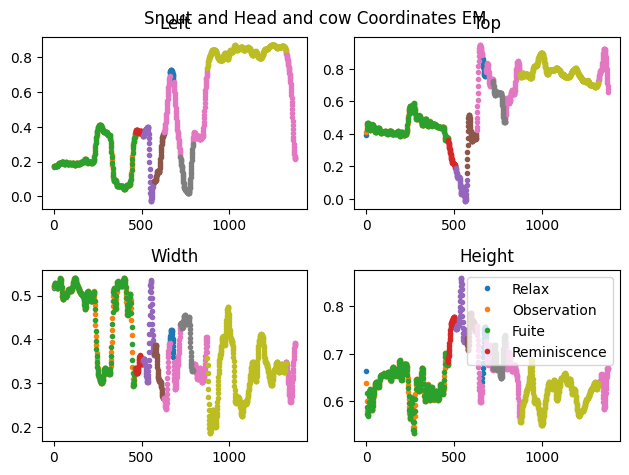

In [7]:
em_states = pd.unique(em_Z)
state_names = ['Relax', 'Observation', 'Fuite', 'Reminiscence']

plt.subplot(2,2,1)
for i in em_states:
    #print(len(X))
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,0][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
plt.subplot(2,2,2)
for i in em_states:
    #print(len(X[1:,0]))
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,1][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Top")
plt.subplot(2,2,3)
for i in em_states:
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,2][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Width")
plt.subplot(2,2,4)
for i in em_states:
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,3][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Height")

plt.tight_layout()
plt.legend(labels=state_names, loc="upper right", ncol=1)
plt.suptitle('Snout and Head and cow Coordinates EM')
# rajouter les etiquettes 

Text(0.5, 0.98, 'Snout and Head and cow Coordinates VI')

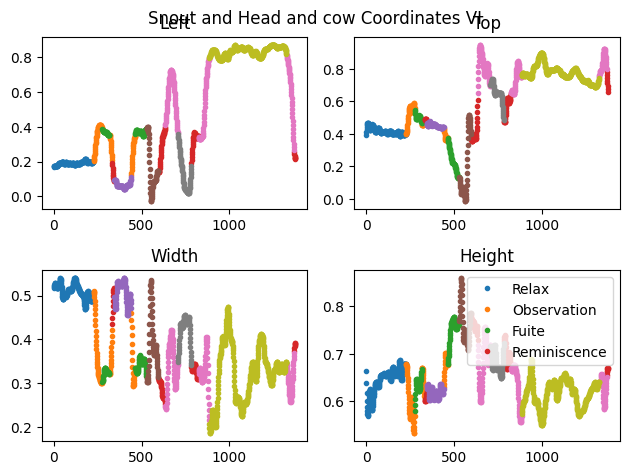

In [8]:
vi_states = pd.unique(vi_Z)

plt.subplot(2,2,1)
for i in vi_states:
    #print(len(X))
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,0][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Left')
plt.subplot(2,2,2)
for i in vi_states:
    #print(len(X[1:,0]))
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,1][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Top')
plt.subplot(2,2,3)
for i in vi_states:
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,2][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Width')
plt.subplot(2,2,4)
for i in vi_states:
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,3][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Height')

plt.tight_layout()
plt.legend(labels=state_names, loc="upper right", ncol=1)
plt.suptitle('Snout and Head and cow Coordinates VI')

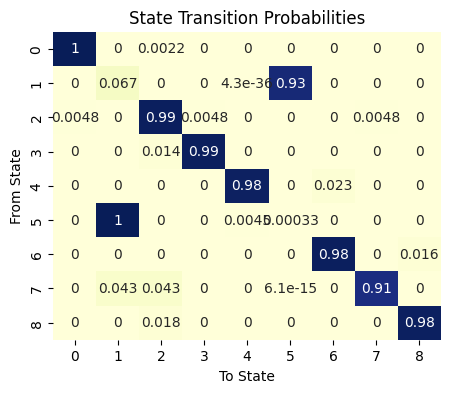

In [9]:
transition_matrix = em_model.transmat_
plt.figure(figsize=(5, 4))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

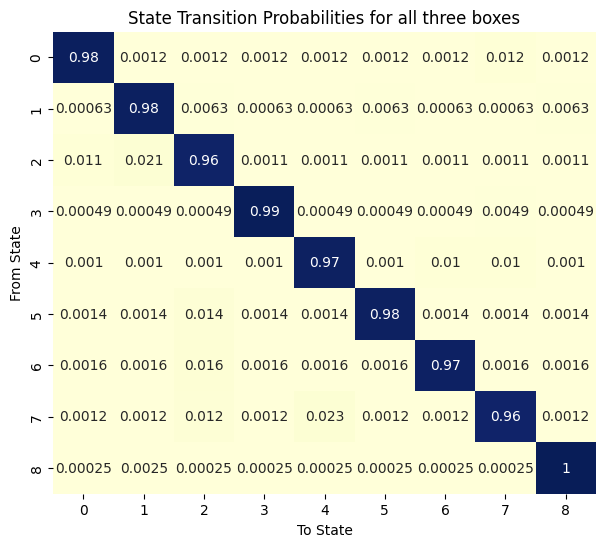

In [11]:
transition_matrix = vi_model.transmat_
plt.figure(figsize=(7, 6))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities for all three boxes')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

In [21]:
""" predicted_state = em_model.predict_proba(X)
predicted_state
df = pd.DataFrame(predicted_state)
df.to_csv("../INF889E Project/Trained data/EM/predict_3boxes.csv")

 """

In [22]:
""" 

df = pd.DataFrame({'original_state': em_Z})
df.to_csv("../INF889E Project/Trained data/EM/head_Snout_cow_coords_hmmstates.csv")
df=pd.DataFrame({'states':vi_Z})
df.to_csv("../INF889E Project/Trained data/VI/head_Snout_cow_coords_hmmstates.csv") """

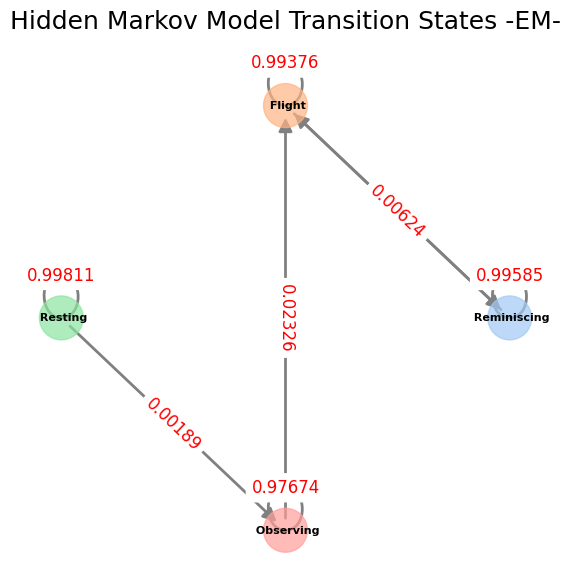

In [57]:
# Create a directed graph using NetworkX
G = nx.DiGraph()
transition_matrix = em_model.transmat_
num_states = transition_matrix.shape[0]
dic_state = {
    1 : 'Resting',
    3 : 'Observing',
    2 : 'Flight',
    0 : 'Reminiscing'
}
for i in range(num_states):
    for j in range(num_states):
        prob = transition_matrix[i, j]
        if prob > 0:  # Only add edges for non-zero probabilities
            G.add_edge(f' {dic_state[i]}', f' {dic_state[j]}', weight=prob)


# Use a color palette from seaborn for visual appeal
colors = sns.color_palette("pastel", num_states)

# Visualize the graph with enhanced aesthetics
pos = nx.circular_layout(G)
edge_labels = {(n1, n2): f"{d['weight']:.5f}" for n1, n2, d in G.edges(data=True)}

plt.figure(figsize=(7, 7))
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=colors, node_shape="o", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=2, edge_color="gray", arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.title('Hidden Markov Model Transition States -EM-', fontsize=18)
plt.axis('off')
plt.show()

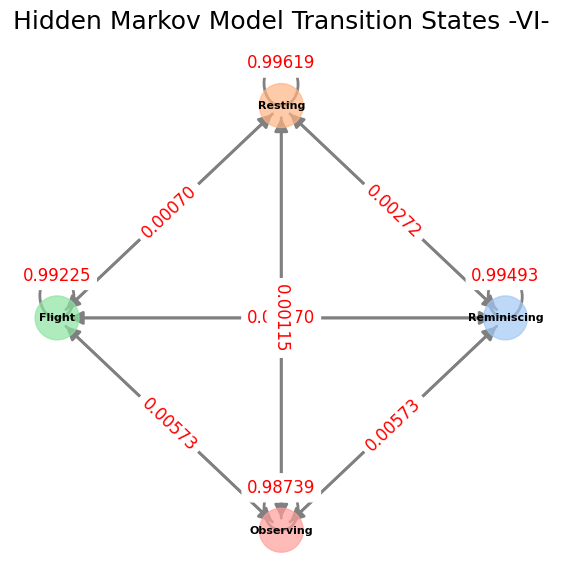

In [58]:
# Create a directed graph using NetworkX
G = nx.DiGraph()
transition_matrix = vi_model.transmat_
num_states = transition_matrix.shape[0]
for i in range(num_states):
    for j in range(num_states):
        prob = transition_matrix[i, j]
        if prob > 0:  # Only add edges for non-zero probabilities
            G.add_edge(dic_state[i], dic_state[j], weight=prob)

# Use a color palette from seaborn for visual appeal
colors = sns.color_palette("pastel", num_states)

# Visualize the graph with enhanced aesthetics
pos = nx.circular_layout(G)
edge_labels = {(n1, n2): f"{d['weight']:.5f}" for n1, n2, d in G.edges(data=True)}

plt.figure(figsize=(7, 7))
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=colors, node_shape="o", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=2, edge_color="gray", arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.title('Hidden Markov Model Transition States -VI-', fontsize=18)
plt.axis('off')
plt.show()